# Práctica 7: Red neuronal multiclase. Evaluación detallada.

Greta y Héloïse

Grupo 2

## Conjunto de datos

Separa los datos en entrenamiento, validación y test (60-20-20) y úsalos adecuadamente.

1. Obtener y observar los datos

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

def gen_blobs():
  classes = 6
  m = 800
  std = 0.4
  centers = np.array([[-1, 0],[1, 0],[0, 1],[0, -1],[-2,1],[-2,-1]])
  X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
  return (X, y, centers, classes, std)

In [3]:
# Call the gen_blobs() function to generate the data
X, y, centers, classes, std = gen_blobs()
print(X.shape, y.shape)
m = 800

(800, 2) (800,)


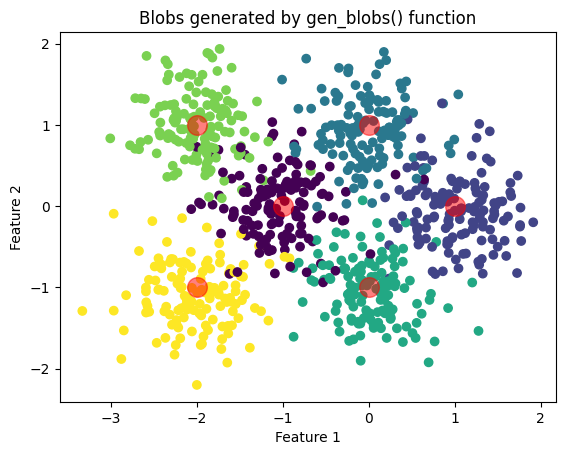

In [4]:
import matplotlib.pyplot as plt

# Plot the data points with different colors for each class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Plot the blob centers as black dots
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# Set axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blobs generated by gen_blobs() function')

# Display the plot
plt.show()

2. Separar los datos en entrenamiento, validación y test (60-20-20)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train) # 0.25 x 0.8 = 0.2

print("Dimension tabla X_train: ", X_train.shape, ", Dimension tabla y_train: ", y_train.shape)
print("Dimension tabla X_val: ", X_val.shape, ", Dimension tabla y_val: ", y_val.shape)
print("Dimension tabla X_test: ", X_test.shape, ", Dimension tabla y_test: ", y_test.shape)

val_size = np.shape(y_val)[0]
test_size = np.shape(y_test)[0]

Dimension tabla X_train:  (480, 2) , Dimension tabla y_train:  (480,)
Dimension tabla X_val:  (160, 2) , Dimension tabla y_val:  (160,)
Dimension tabla X_test:  (160, 2) , Dimension tabla y_test:  (160,)


3. Normalizar los datos

In [6]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_val = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Red neuronal con TensorFlow

Implementa varias redes neuronales en tensorflow y determina cual es la mejor configuración.

Hay que probar 3 configuraciones (de 3 capas):
- un modelo complejo con muchas neuronas, 
- un modelo simple con pocas neuronas,
- un modelo complejo con muchas neuronas y regularización, ajustando el mejor valor de lambda (utiliza una visualización).

Pinta las curvas de aprendizaje de las 3 configuraciones y explica lo que se muestra.

Elige los valores de los hiperparámetros que estimes oportuno, pero justifica tu decisión.


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

## Modelo complejo con muchas neuronas
Usamos 100 neuronas en la primera capa y muchas epochs

1. Entrenamiento con distintos tamanos de entrenamiento y curva de aprendizaje

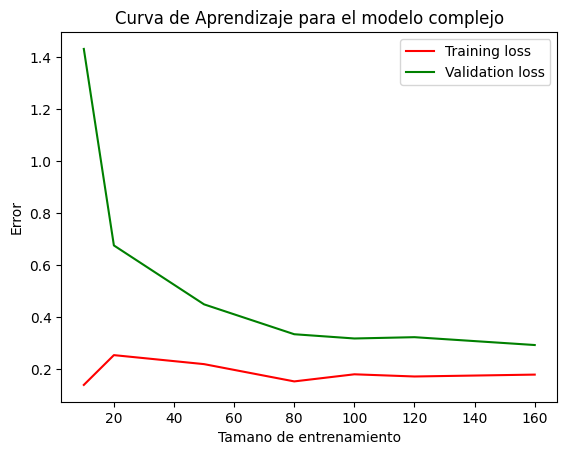

In [8]:
# Neural network
train_size = [10, 20, 50, 80, 100, 120, 160]
train_loss = []
val_loss = []

for k in (train_size) :
  model_1 = Sequential([
      Dense(100, activation='relu'),
      Dense(60, activation='relu'),
      Dense(classes, activation='linear')
  ])
  model_1.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model_1.fit(X_train[:k, :], y_train[:k], epochs=100, batch_size=32, verbose=0)

  train_loss_k, _ = model_1.evaluate(X_train[:k, :], y_train[:k], verbose=0)
  val_loss_k, _ = model_1.evaluate(X_val, y_val, verbose=0)

  train_loss.append(train_loss_k)
  val_loss.append(val_loss_k)

# Plot the learning curve
plt.plot(train_size, train_loss, color='r', label='Training loss')
plt.plot(train_size, val_loss, color='g', label='Validation loss')
plt.xlabel('Tamano de entrenamiento')
plt.ylabel('Error')
plt.title('Curva de Aprendizaje para el modelo complejo')
plt.legend(loc='best')
plt.show()


Con la curva de aprendizaje, vemos que el "bias" es bajo y la "variance"  un poco alta, esto significa que estamos en un caso de Overfitting.

El overfitting se produce cuando el modelo funciona bien en el conjunto de entrenamiento, pero mucho peor en el conjunto de validación (variance alta). Otra observación importante que podemos hacer aquí es que es muy probable que la adición de nuevas instancias de entrenamiento conduzca a modelos mejores. La curva de validación no se estabiliza en el tamaño máximo del conjunto de entrenamiento utilizado. Todavía tiene potencial para disminuir y converger hacia la curva de entrenamiento.

2. Curva de la precisión con todos los datos de entrenamiento

Pintamos la precisión en el conjunto de entrenamiento y validación en función del número de épocas. Si el modelo está sobreajustando, la precisión en el conjunto de entrenamiento será mayor que la precisión en el conjunto de validación, y esto se puede ver claramente en la gráfica.

In [9]:
# Neural network
model_1 = Sequential([
    Dense(100, activation='relu'),
    Dense(60, activation='relu'),
    Dense(classes, activation='linear')
])

model_1.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

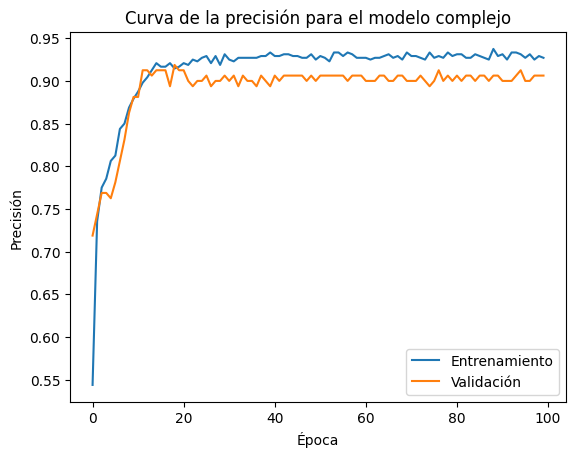

In [10]:
# Grafica de la precisión en el conjunto de entrenamiento y validación
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Curva de la precisión para el modelo complejo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()


Aqui vemos en la gráfica que el modelo está sobreajustando: la precisión en el conjunto de entrenamiento sobrepasa la precisión del conjunto de validación.

Es un caso de "overfitting" cuando se toma demasiado épocas. Para evitar overfitting tendriamos que hacer el fitting con 18 épocas.

3. Predicción

In [11]:
newY = np.zeros((test_size, 1), dtype='int64')

for i in range (test_size):
  pi = model_1.predict(X_test[i].reshape(1,2), verbose = 0)   
  prediction_p = tf.nn.softmax(pi).numpy()
  yhat = np.argmax(prediction_p)

  newY[i] = yhat

In [12]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Training Set Accuracy:", accuracy_score(newY, y_test)*100,"%")

Training Set Accuracy: 94.375 %


El modelo complejo funciona bastante bien (94% de precisión) pero hemos visto que somos en un caso de "overfitting".

## Modelo simple con pocas neuronas
Usamos 10 neuronas en la primera capa y pocas epochs

1. Entrenamiento con distintos tamanos de entrenamiento y curva de aprendizaje

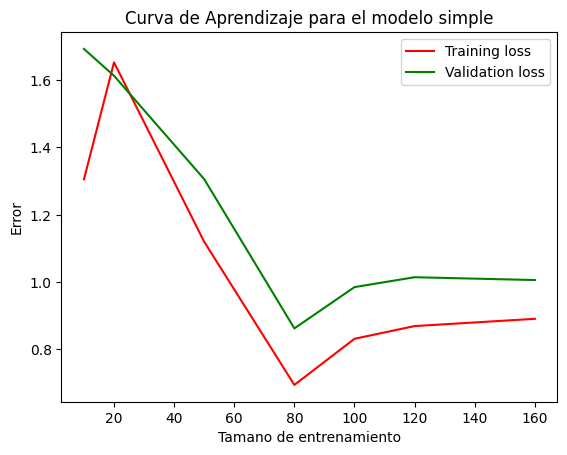

In [13]:
train_size = [10, 20, 50, 80, 100, 120, 160]
train_loss = []
val_loss = []

for k in (train_size) :
  model_2 = Sequential([
      Dense(10, activation='relu'),
      Dense(6, activation='relu'),
      Dense(classes, activation='linear')
  ])
  model_2.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model_2.fit(X_train[:k, :], y_train[:k], epochs=100, batch_size=32, verbose=0)

  train_loss_k, _ = model_2.evaluate(X_train[:k, :], y_train[:k], verbose=0)
  val_loss_k, _ = model_2.evaluate(X_val, y_val, verbose=0)

  train_loss.append(train_loss_k)
  val_loss.append(val_loss_k)

# Plot the learning curve
plt.plot(train_size, train_loss, color='r', label='Training loss')
plt.plot(train_size, val_loss, color='g', label='Validation loss')
plt.xlabel('Tamano de entrenamiento')
plt.ylabel('Error')
plt.title('Curva de Aprendizaje para el modelo simple')
plt.legend(loc='best')
plt.show()


Con esta curva de aprendizaje, vemos que el "bias" es alto (error > 0.8) y la "variance" baja. Esto significa que es un caso de Underfitting.

Con un "bias" alto no es util anadir datos. El error es demasiado alto entonces el modelo esta subajustando.

2. Curva de la precisión con todos los datos de entrenamiento

In [14]:
# Neural network
model_2 = Sequential([
    Dense(10, activation='relu'),
    Dense(6, activation='relu'),
    Dense(classes, activation='linear')
])

model_2.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)


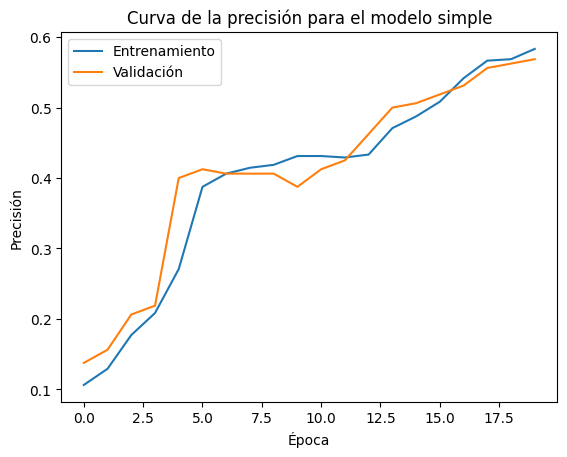

In [15]:
# Grafica de la precisión en el conjunto de entrenamiento y validación
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Curva de la precisión para el modelo simple')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

Aqui vemos en la gráfica que el modelo está subajustando: la precisión en el conjunto de entrenamiento esta menor que la precisión del conjunto de validación.

Es un caso de "underfitting".

3. Predicción

In [16]:
newY_2 = np.zeros((test_size, 1), dtype='int64')

for i in range (test_size):
  pi = model_2.predict(X_test[i].reshape(1,2), verbose = 0)   
  prediction_p = tf.nn.softmax(pi).numpy()
  yhat = np.argmax(prediction_p)

  newY_2[i] = yhat

In [17]:
#Accuracy
print("Training Set Accuracy:", accuracy_score(newY_2, y_test)*100,"%")

Training Set Accuracy: 60.0 %


El modelo simple no funciona muy bien (60% de precisión) y hemos visto que es un caso de "underfitting".



## Modelo complejo con muchas neuronas y regularización

1. Ajuste del mejor valor de lambda con visualización

Para encontrar los mejores hiperparámetros para el modelo complejo con muchas neuronas y regularización, se puede variar el valor de lambda en el rango [0.001, 0.01, 0.1, 1.0, 10.0] y seleccionar el valor que da la mejor precisión.

In [18]:
# Definir rango de valores para lambda
lambda_range = [0.001, 0.01, 0.1, 1.0, 10.0]

for lamb in lambda_range:    
    # Neural network    
    model_3 = Sequential([
      Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
      Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
      Dense(classes, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lamb))
    ])
    model_3.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    model_3.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    train_loss, _ = model_3.evaluate(X_train, y_train, verbose=0)
    val_loss, _ = model_3.evaluate(X_val, y_val, verbose=0)

    print("Para el modelo con λ = ", lamb, ", train_loss = ", train_loss, " y val_loss = ", val_loss)

Para el modelo con λ =  0.001 , train_loss =  0.2677564024925232  y val_loss =  0.3320873975753784
Para el modelo con λ =  0.01 , train_loss =  0.5649291276931763  y val_loss =  0.5950738787651062
Para el modelo con λ =  0.1 , train_loss =  1.7917743921279907  y val_loss =  1.791727066040039
Para el modelo con λ =  1.0 , train_loss =  1.791761040687561  y val_loss =  1.7917585372924805
Para el modelo con λ =  10.0 , train_loss =  1.791764736175537  y val_loss =  1.7917547225952148


Asi, el mejor resultado se obtiene con un bias bajo (eliminamos λ> 0.01) y una variance baja (0.064 con λ = 0.001 -> riesgo de subreajuste; 0.03 con λ = 0.01 -> bien) asi que elegimos a λ =  0.01.

Podemos pintar la curva de aprendizaje con el lambda optimo. 




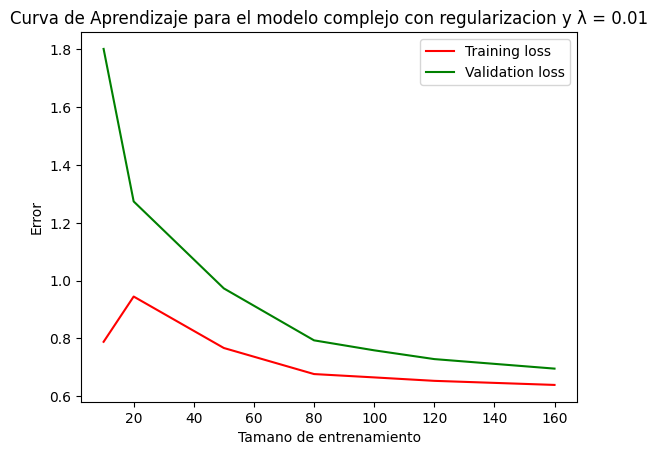

In [27]:
train_size = [10, 20, 50, 80, 100, 120, 160]
train_loss = []
val_loss = []
lamb = 0.01

for k in (train_size) :
  model_3 = Sequential([
      Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
      Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
      Dense(classes, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lamb))
    ])
  model_3.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
  model_3.fit(X_train[:k, :], y_train[:k], epochs=100, batch_size=32, verbose=0)

  train_loss_k, _ = model_3.evaluate(X_train[:k, :], y_train[:k], verbose=0)
  val_loss_k, _ = model_3.evaluate(X_val, y_val, verbose=0)

  train_loss.append(train_loss_k)
  val_loss.append(val_loss_k)

# Plot the learning curve
plt.plot(train_size, train_loss, color='r', label='Training loss')
plt.plot(train_size, val_loss, color='g', label='Validation loss')
plt.xlabel('Tamano de entrenamiento')
plt.ylabel('Error')
plt.title('Curva de Aprendizaje para el modelo complejo con regularizacion y λ = 0.01')
plt.legend(loc='best')
plt.show()


Con la curva de aprendizaje, vemos que el "bias" es bajo y la "variance" baja, esto significa que el modelo ajusta bien.

El modelo funciona bien en el conjunto de entrenamiento y en el conjunto de validación, con bastante datos de entrenamiento. La regularizacion a permitido bajar la variance.


Podemos tambien encontrar este resultado con la evolucion de la precision segun las épocas para todos los lambdas.

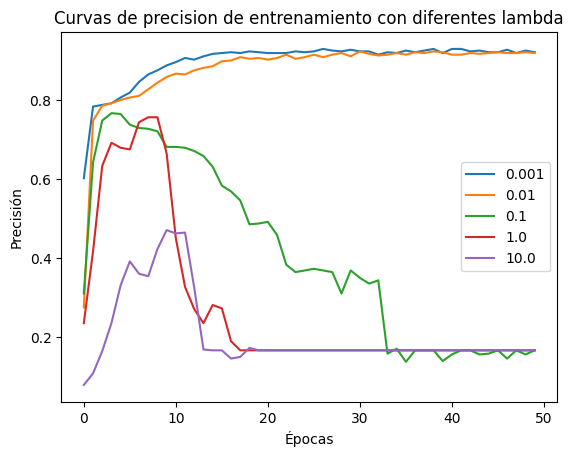

In [22]:
# Definir rango de valores para lambda
lambda_range = [0.001, 0.01, 0.1, 1.0, 10.0]

# Definir función para evaluar el modelo con cada combinación de hiperparámetros
def evaluate_model(X_train, y_train, X_val, y_val, lamb):
  model_3 = Sequential([
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
    Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
    Dense(classes, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lamb))
  ])
  model_3.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
  fit_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
  return fit_3

# Realizar la búsqueda del mejor lambda con la visualizacion
for lamb in lambda_range:
    history_3 = evaluate_model(X_train, y_train, X_val, y_val, lamb)
    plt.plot(history_3.history['accuracy'])
    plt.title('Curvas de precision de entrenamiento con diferentes lambda')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend(lambda_range)

Con λ >= 0.1, las simulaciones son malas. Mientras que con valores entre 0.01 y 0.001, la precision es buena (mayor que 80%).

2. Entrenamiento con λ = 0.1

In [23]:
lamb = 0.01
model_3 = Sequential([
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
    Dense(60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamb)),
    Dense(classes, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lamb))
])

model_3.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)


3. Curva de la precisión con todos los datos de entrenamiento con λ = 0.1

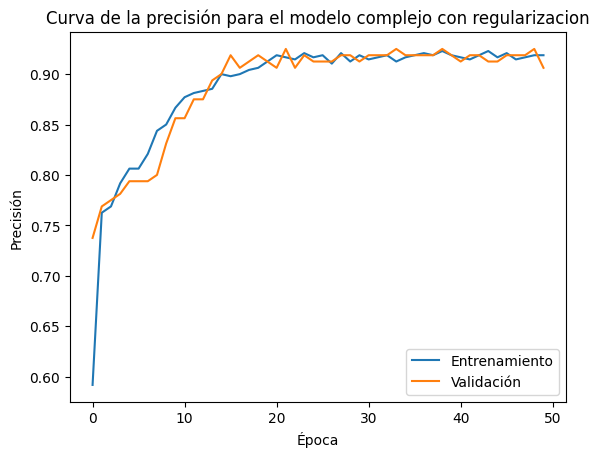

In [24]:
# Grafica de la precisión en el conjunto de entrenamiento y validación
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Curva de la precisión para el modelo complejo con regularizacion')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

Aqui vemos en la gráfica que el modelo funciona muy bien, es mayor que 90% y no está subajustando ni sobreajustando. La precisión en el conjunto de entrenamiento está muy cerca de la precisión del conjunto de validación sin sobrepasarla.

Es un caso de "good fitting".


4. Predicción con λ = 0.1

In [25]:
newY_3 = np.zeros((test_size, 1), dtype='int64')

for i in range (test_size):
  pi = model_3.predict(X_test[i].reshape(1,2), verbose = 0)   
  prediction_p = tf.nn.softmax(pi).numpy()
  yhat = np.argmax(prediction_p)

  newY_3[i] = yhat

In [26]:
#Accuracy
print("Training Set Accuracy:", accuracy_score(newY_3, y_test)*100,"%")

Training Set Accuracy: 93.75 %


De hecho, con este modelo obtenemos una muy buena precisión de 94%.
Es el mejor modelo de las 3 configuraciones.

# Conclusión sobre los hiperparámetros

Elige los valores de los hiperparámetros que estimes oportuno, pero justifica tu decisión.

Para elegir los valores de los hiperparámetros en este caso, consideramos lo siguiente:

- Número de neurona en las capas escondidas de la red: cuanto mas neuronas hay en la primera capa, mejor puede ser capaz de aprender representaciones más complejas, pero puede ser propensa a sobreajustar (overfitting) los datos de entrenamiento. Para evitar el sobreajuste, se puede usar la regularización, como la penalización L2. Si el número de neuronas en la primera capa no es suficiente puede que haya un subajuste (underfitting). 

- Número de épocas: El número de épocas determina cuántas veces se recorren los datos de entrenamiento durante el entrenamiento. Si el número de épocas es demasiado bajo, la red puede no tener tiempo suficiente para converger. Si el número de épocas es demasiado alto, la red puede sobreajustarse a los datos de entrenamiento.

- Valor óptimo de lambda para la regularización: El valor de lambda en la regularización L2 controla la magnitud de los coeficientes de los pesos en la función de coste del modelo. Cuando lambda es muy pequeño, los pesos pueden tomar valores grandes y llevar a un sobreajuste del modelo. Cuando lambda es muy grande, los pesos se acercan a cero y pueden llevar a un subajuste del modelo. Por lo tanto, se debe elegir un valor de lambda cuidadosamente para encontrar un equilibrio entre la complejidad del modelo y su capacidad de generalización.

Para concluir, el mejor conjunto de hiperparámetros para nuestro conjunto de datos es con muchos neuronas en la primera capa de la red (100 neuronas) usando la regularización L2 para evitar un overfitting. Y elegimos como valor óptimo de lambda λ = 0.01.